In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as r

### Question 1. Overdamped Free Diffusion

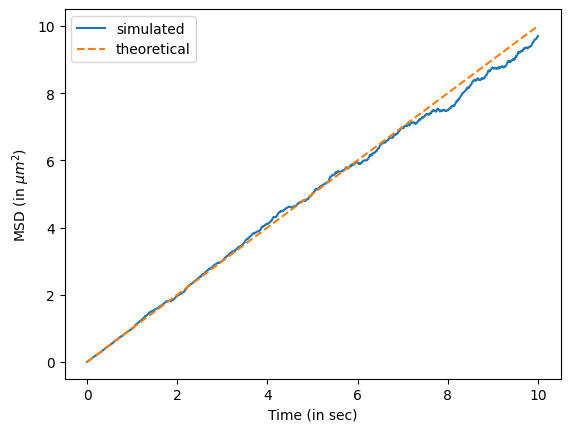

In [2]:
# parameters
N_sim = 1000
D = 0.5
t0,tf,dt = 0.0,10.0,0.01
x0 = 0.0
N = int((tf-t0)/dt+1)
a1 = (2*D*dt)**0.5

# singal trajectory
def traj_1():
    x_arr = np.zeros((N,),float)
    x_arr[0] = x0
    for i in range(N-1):
        x_arr[i+1] = x_arr[i] + a1*r.standard_normal()
    return x_arr

# multiple trajectories and MSD of ensemble
t_arr = np.arange(t0,tf+dt,dt)
MSD_arr = np.zeros((N,),float)
for i in range(N_sim):
    x_arr = traj_1()
    for j in range(N):
        MSD_arr[j] += (x_arr[j]-x_arr[0])**2
MSD_arr /= N_sim

# theoretical trend
MSD_theo = 2*D*t_arr

# plotting
plt.plot(t_arr,MSD_arr,label = 'simulated')
plt.plot(t_arr,MSD_theo,label = 'theoretical', ls = '--')
plt.xlabel('Time (in sec)')
plt.ylabel('MSD (in $\mu m^2$)')
plt.legend()
plt.show()

### Question 2. Velocity Autocorrelation Function

In [3]:
# parameters
t0,tf,dt = 0.0,0.1,10**-4
m = 10**-10
gmma = 10**-8
T = 300
kb = 1.38*10**-23
a = gmma/m
b = (2*gmma*kb*T*dt)**0.5/m
N = int((tf-t0)/dt+1)
N_sim = 1000
# print(a,b)

# single trajectory
def traj_2():
    v_arr = np.zeros((N,),float)
    for i in range(N-1):
        v_arr[i+1] = v_arr[i] - a*v_arr[i]*dt + b*r.standard_normal()
    return v_arr


# calculating velocity autocorrelation function
auto_corr = np.zeros((N,),float)
for i in range(N_sim):
    v_arr = traj_2()
    for j in range(N):
        auto_corr[j] += np.mean(v_arr[j:]*v_arr[:N-j])
auto_corr /= N_sim
auto_corr_normalized = auto_corr/auto_corr[0]

t_arr = np.linspace(t0,tf,len(auto_corr))

# theoretical
auto_corr_theo = np.exp(-a*t_arr)

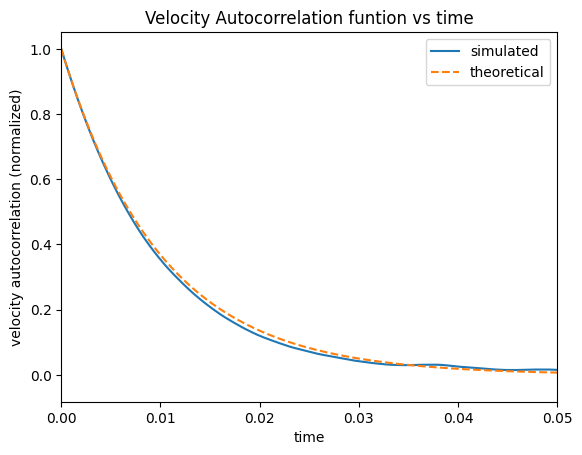

In [4]:
# plotting
plt.plot(t_arr,auto_corr_normalized,label = 'simulated')
plt.plot(t_arr,auto_corr_theo, ls = '--',label = 'theoretical')
plt.title('Velocity Autocorrelation funtion vs time')
plt.xlabel('time')
plt.ylabel('velocity autocorrelation (normalized)')
plt.xlim(0,0.05)
plt.legend()
plt.show()

### Question 3. Diffusion in a Harmonic Potential

In [3]:
# parameters
k = 10**-6
gmma = 10**-8
T = 300
kb = 1.38*10**-23
dt = 0.001
t0,tf = 0.0,100.0
N = int((tf-t0)/dt+1)
N_sim = 1000
a = k/gmma
b = (2*kb*T/gmma*dt)**0.5
# print(a,b)
# single trajectory
def traj_3():
    x_arr = np.zeros((N,),float)
    for i in range(N-1):
        x_arr[i+1] = x_arr[i] - a*x_arr[i]*dt + b*r.standard_normal()
    return x_arr[-1]

# all simulations
disp_arr = []
for i in range(N_sim):
    disp_arr.append(traj_3())

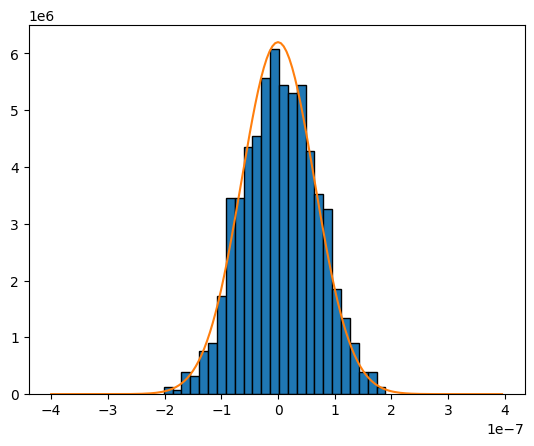

In [7]:
# Boltzmann distribution
x_arr = np.arange(-4*10**-7,4*10**-7,5*10**-9)
c = (2*np.pi*kb*T/k)**-0.5
d = k/2/kb/T
P_arr = c*np.exp(-d*x_arr**2)

# plotting the prob. distribution
plt.hist(disp_arr,bins = 25,edgecolor = 'k',density = True)
plt.plot(x_arr,P_arr)
plt.show()

### Question 4. Escape Over a Potential Barrier

In [7]:
# parameters
gmma = 1
D = 0.25
dt = 0.01
x0 = -1
N_sim = 1000

# single trajectory (returns time of crossing the well)
def traj_4():
    tf = 0.0
    x_arr = [x0]
    while x_arr[-1]<0:
        x_arr.append(x_arr[-1]-4*(x_arr[-1]**3-x_arr[-1])*dt/gmma+(2*D*dt)**0.5*r.standard_normal())
        tf+=dt
    return tf

# single trajectories (returns the trajectory)
def traj_4_modified():
    tf = 0.0
    x_arr = [x0]
    while x_arr[-1]<0:
        x_arr.append(x_arr[-1]-4*(x_arr[-1]**3-x_arr[-1])*dt/gmma+(2*D*dt)**0.5*r.standard_normal())
        tf+=dt
    t_arr = np.linspace(0.0,tf,len(x_arr))
    return t_arr, np.array(x_arr)

# simulating N_sim times
tf_arr = []
for i in range(N_sim):
    tf_arr.append(traj_4())
tf_arr = np.array(tf_arr)

# avg time of crossing
print(f'The average time for the particle to cross x=0 boundary : {np.mean(tf_arr)}')

The average time for the particle to cross x=0 boundary : 35.949640000000834


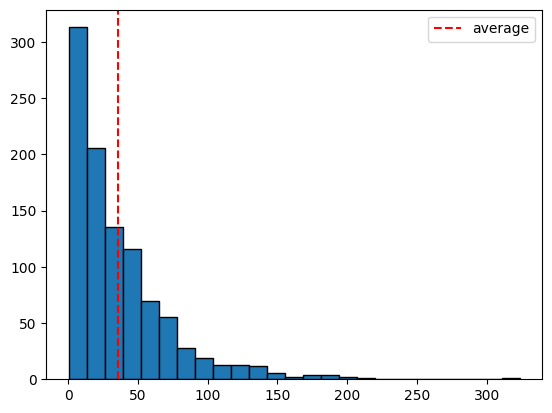

In [11]:
# histogram
plt.hist(tf_arr,bins=25,edgecolor = 'k')
plt.axvline(np.mean(tf_arr),c = 'red',ls = '--', label = 'average')
plt.legend()
plt.show()

C:\Users\ANUNAY CHANDRA\AppData\Local\Temp\ipykernel_42376\1519656026.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(N_traj,1,i+1)


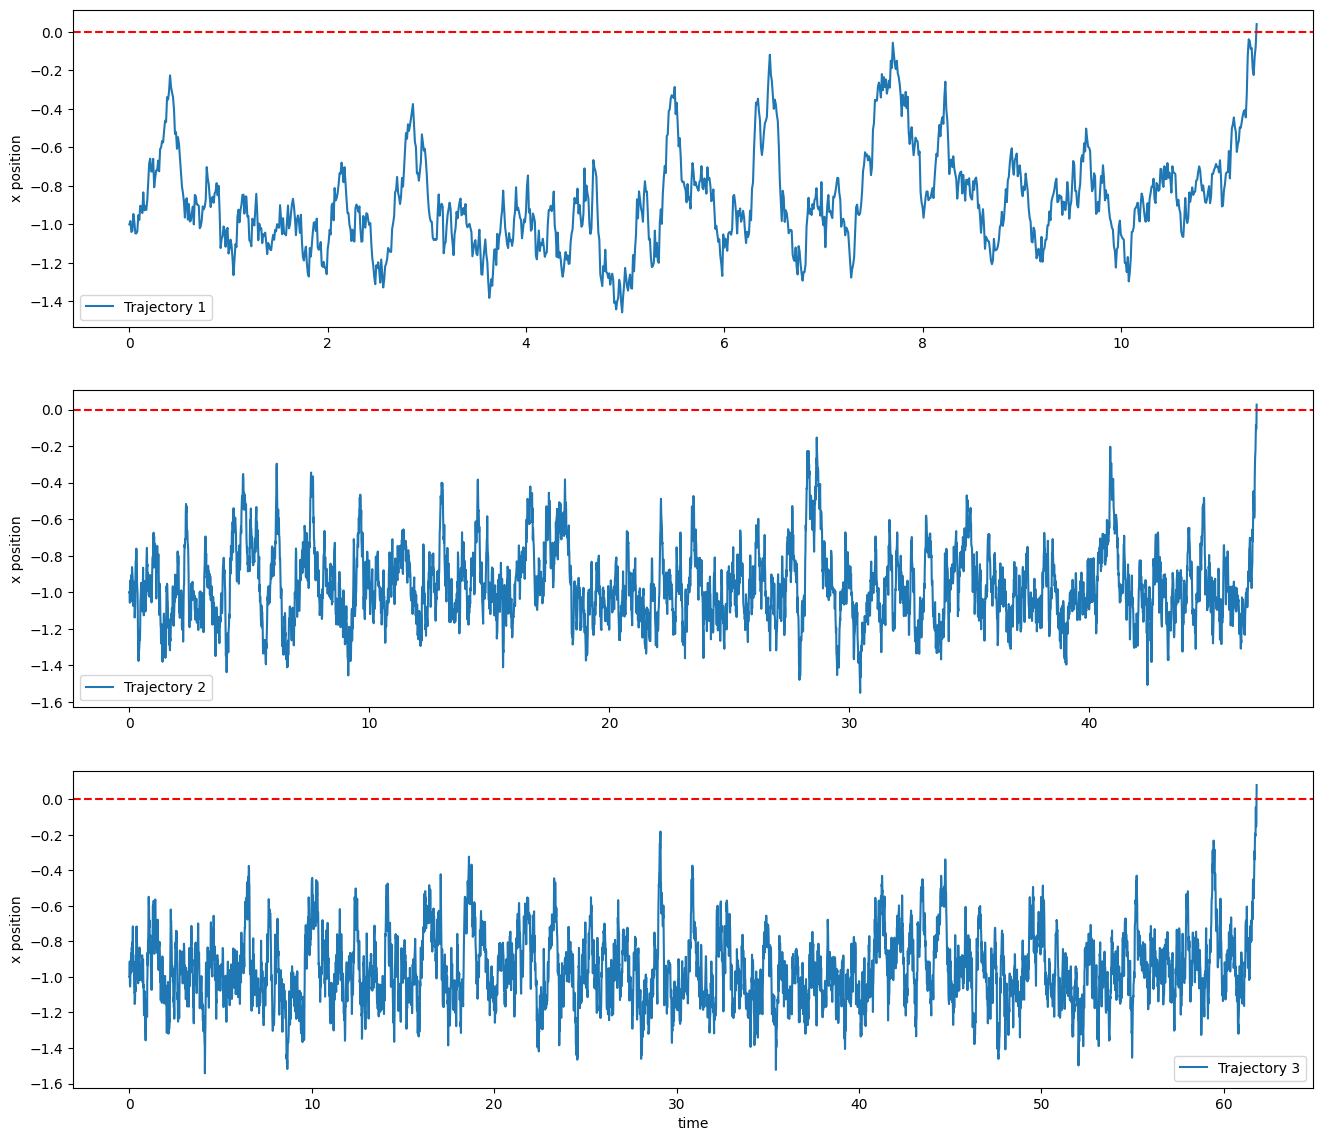

In [12]:
# visualising some trajectories
N_traj = 3      # no. of trajectories to be plotted
Height = N_traj * 4+2
plt.figure(figsize = (16,Height))
plt.title('Simulated Trajectories')
for i in range(N_traj):
    t_arr,x_arr = traj_4_modified()
    plt.subplot(N_traj,1,i+1)
    plt.plot(t_arr,x_arr,label = f'Trajectory {i+1}')
    plt.axhline(0,c = 'red',ls = '--')
    plt.ylabel('x position')
    plt.legend()
plt.xlabel('time')
plt.show()

### Question 5. 2D Brownian Motion.

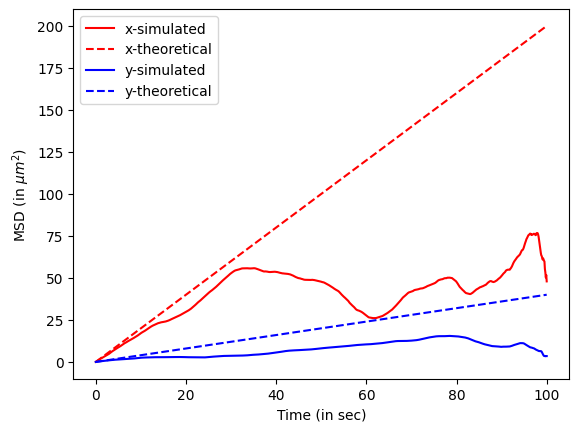

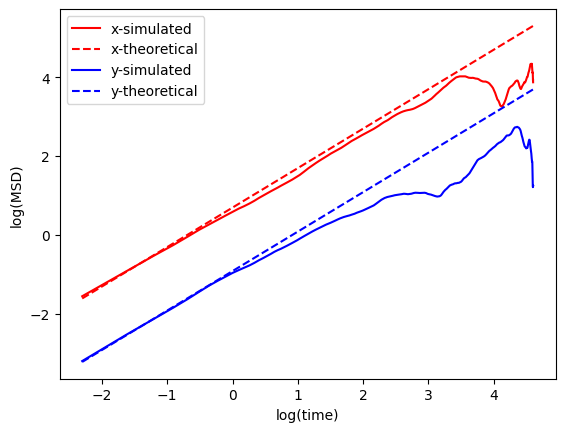

In [13]:
# parameters
Dx = 1.0
Dy = 0.2
t0,tf,dt = 0.0,100.0,0.1
ax,ay = (2*Dx*dt)**0.5,(2*Dy*dt)**0.5
x0,y0 = 0.0,0.0
N = int((tf-t0)/dt+1)

# single trajectory
def traj_5():
    x_arr = np.zeros((N,),float)
    y_arr = np.zeros((N,),float)
    x_arr[0], y_arr[0] = x0, y0
    for i in range(N-1):
        x_arr[i+1] = x_arr[i] + ax*r.standard_normal()
        y_arr[i+1] = y_arr[i] + ay*r.standard_normal()
    return x_arr,y_arr

# simulate the single trajectory
x_arr, y_arr = traj_5()

# Evaluating the MSDs from simulated trajectory
MSDx, MSDy = np.zeros((N,),float), np.zeros((N,),float)
lags = np.arange(t0,tf+dt,dt)
for i in range(N):
    MSDx[i] = np.mean((x_arr[i:]-x_arr[:N-i])**2)
    MSDy[i] = np.mean((y_arr[i:]-y_arr[:N-i])**2)

# MSDs using theoretical formula
t_arr = np.arange(t0,tf+dt,dt)
MSD_xtheo = 2*Dx*t_arr
MSD_ytheo = 2*Dy*t_arr

# plotting
plt.plot(t_arr,MSDx,label = 'x-simulated',c = 'red')
plt.plot(t_arr,MSD_xtheo,label = 'x-theoretical',c = 'red',ls = '--')
plt.plot(t_arr,MSDy,label = 'y-simulated',c = 'blue')
plt.plot(t_arr,MSD_ytheo,label = 'y-theoretical',c = 'blue',ls = '--')
plt.xlabel('Time (in sec)')
plt.ylabel('MSD (in $\mu m^2$)')
plt.legend()
plt.show()

# log plots
plt.plot(np.log(t_arr[1:]),np.log(MSDx[1:]),label = 'x-simulated',c = 'red')
plt.plot(np.log(t_arr[1:]),np.log(MSD_xtheo[1:]),label = 'x-theoretical',c = 'red',ls = '--')
plt.plot(np.log(t_arr[1:]),np.log(MSDy[1:]),label = 'y-simulated',c = 'blue')
plt.plot(np.log(t_arr[1:]),np.log(MSD_ytheo[1:]),label = 'y-theoretical',c = 'blue',ls = '--')
plt.xlabel('log(time)')
plt.ylabel('log(MSD)')
plt.legend()
plt.show()

### Question 7. Mean First-Passage Time

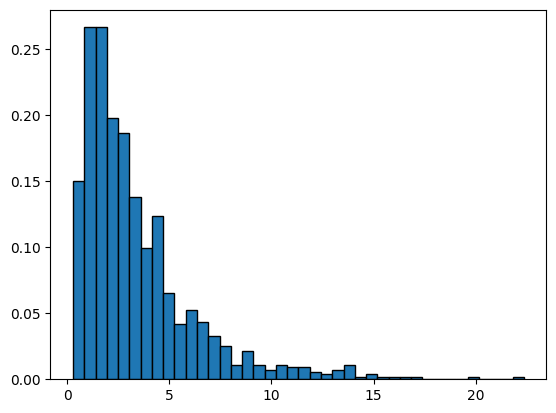

In [14]:
# parameters
D = 1.0
x0 = 2.5
dt = 0.01
N_sim = 1000

# single trajectory
def traj_7():
    x_arr = [x0]
    tf = 0.0
    while x_arr[-1]<5.0 and x_arr[-1]>0.0:
        x_arr.append(x_arr[-1]+(2*D*dt)**0.5*r.standard_normal())
        tf += dt
    return tf

# simulating 1000 trajectories
tf_arr = []
for i in range(N_sim):
    tf_arr.append(traj_7())
tf_arr = np.array(tf_arr)

# theoretical distribution of the mean first-time passage time
times = np.arange(0,20.0,0.1)


# plottind the histogram
plt.hist(tf_arr,bins=40,edgecolor = 'k',density = True)
plt.show()

### Question 8. Noise-Induced Oscillations

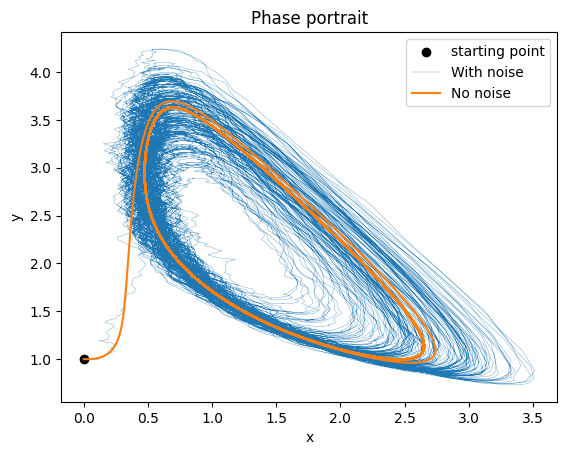

In [15]:
# parameters
D_given = 0.01
t0,tf,dt = 0.0,1000.0,0.05
a,b = 1,2.5
x0,y0 = 0.0,1.0
N = int((tf-t0)/dt+1)

# single trajectory
def traj_8(D):
    x_arr = np.zeros(N)
    y_arr = np.zeros(N)
    x_arr[0],y_arr[0] = x0,y0
    for i in range(N-1):
        x_arr[i+1] = x_arr[i] + (a-(b+1)*x_arr[i]+x_arr[i]**2*y_arr[i])*dt+(2*D*dt)**0.5*r.standard_normal()
        y_arr[i+1] = y_arr[i] + (b*x_arr[i]-x_arr[i]**2*y_arr[i])*dt + (2*D*dt)**2*r.standard_normal()
    return x_arr,y_arr

# simulating the trajectory without noise
t_arr = np.arange(t0,tf+dt,dt)
x_arr_deter, y_arr_deter = traj_8(D=0.0)
x_arr_noise, y_arr_noise = traj_8(D=D_given)

# plotting (phase portrait)
plt.scatter([x0],[y0],label = 'starting point',c = 'k')
plt.plot(x_arr_noise,y_arr_noise,lw = 0.2,label = 'With noise')
plt.plot(x_arr_deter,y_arr_deter,label = 'No noise')
plt.title('Phase portrait')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

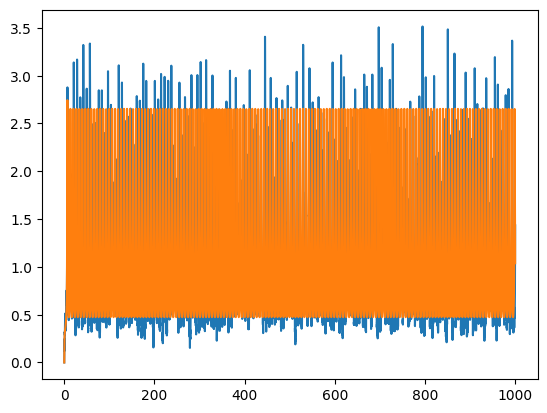

In [16]:
# time series plot
plt.plot(t_arr,x_arr_noise)
plt.plot(t_arr,x_arr_deter)
plt.show()

### Question 9. Non-Markovian Process (Ornstein-Uhlenbeck Noise)

In [17]:
# parameters
tau = 1.0
dt = 0.01
t0,tf = 0.0,1000.0
N = int((tf-t0)/dt+1)
N_sim = 20 # for better accuracy

# ornstein-uhlenbeck noise process
def ounp():
    z_arr = np.zeros((N,),float)
    for i in range(N-1):
        z_arr[i+1] = z_arr[i] - z_arr[i]*dt/tau + (2*dt/tau)**0.5*r.standard_normal()
    return z_arr

# targetted tarjectory
def traj_9():
    z_arr = ounp()
    x_arr = np.zeros((N,),float)
    for i in range(N-1):
        x_arr[i+1] = x_arr[i] + z_arr[i]*dt
    return x_arr

# computing the mean-square-deviation
t_arr = np.arange(t0,tf+dt,dt)
MSD_arr = np.zeros((N,),float)
for k in range(N_sim):
    x_arr = traj_9()
    for i in range(N):
        MSD_arr[i] += np.mean((x_arr[i:]-x_arr[:N-i])**2)

MSD_arr /= N_sim

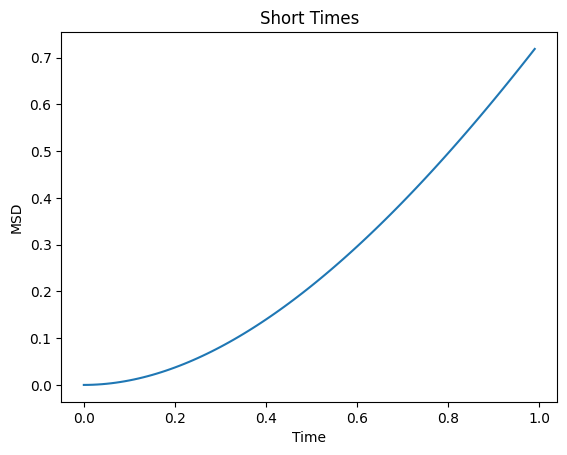

The behaviour is quadratic


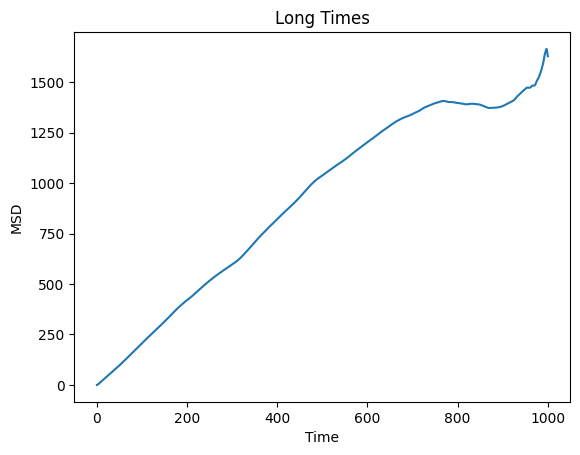

Behaviour is linear


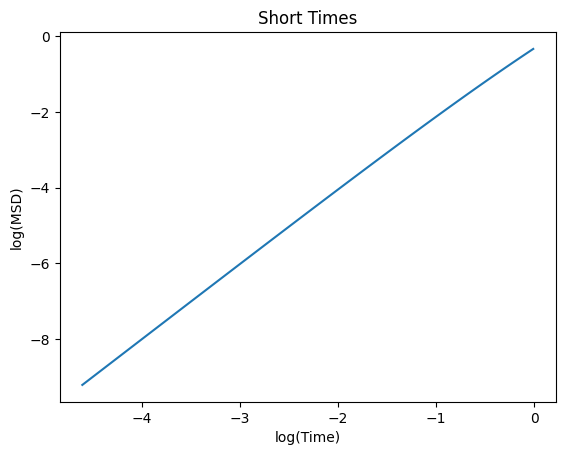

Slope is around 2


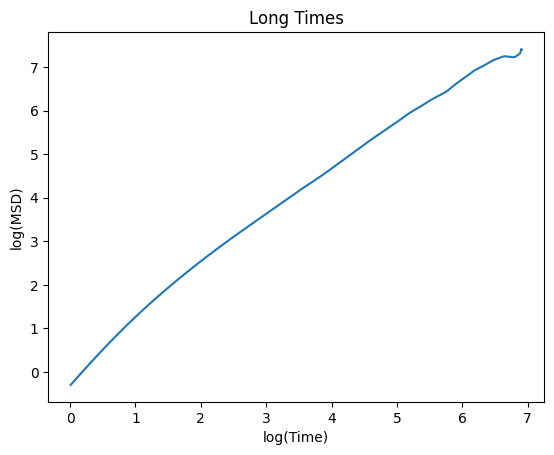

Slope is around 1


In [18]:
# plotting
plt.plot(t_arr[:100],MSD_arr[:100])
plt.xlabel('Time')
plt.ylabel('MSD')
plt.title('Short Times')
plt.show()
print('The behaviour is quadratic')

plt.plot(t_arr,MSD_arr)
plt.xlabel('Time')
plt.ylabel('MSD')
plt.title('Long Times')
plt.show()
print('Behaviour is linear')

# log plots
plt.plot(np.log(t_arr[1:100]),np.log(MSD_arr[1:100]))
plt.xlabel('log(Time)')
plt.ylabel('log(MSD)')
plt.title('Short Times')
plt.show()
print('Slope is around 2')

plt.plot(np.log(t_arr[101:]),np.log(MSD_arr[101:]))
plt.xlabel('log(Time)')
plt.ylabel('log(MSD)')
plt.title('Long Times')
plt.show()
print('Slope is around 1')

### Question 10. Particle in a Tilted Periodic Potential

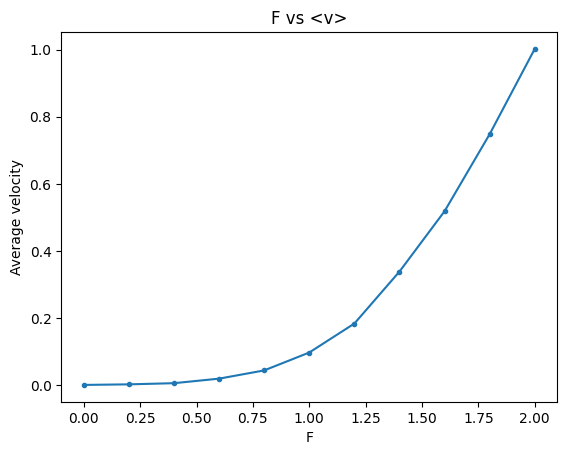

In [19]:
# parameters
U0 = 2.0
F_initial = 0.5
D = 0.5
dt = 0.1
t0, tf = 0.0, 500.0
N_sim = 100
N = int((tf-t0)/dt+1)

# single trajectory
def traj_10(F):
    x_arr = np.zeros((N,),float)
    for i in range(N-1):
        x_arr[i+1] = x_arr[i] + (F-U0*np.sin(x_arr[i]))*dt + (2*D*dt)**0.5*r.standard_normal()
    return x_arr[-1]

# simulating N_sim simulations
def simulate(F):
    del_x = 0.0
    for i in range(N_sim):
        del_x += traj_10(F)
    return del_x/N_sim/tf

# Finding avg velocity as a function of F
F_arr = np.arange(0.0,2.2,0.2)
v_arr = np.zeros_like(F_arr)
for i in range(len(F_arr)):
    v_arr[i] = simulate(F_arr[i])

# plotting
plt.plot(F_arr,v_arr)
plt.scatter(F_arr,v_arr,marker = '.')
plt.title('F vs <v>')
plt.xlabel('F')
plt.ylabel('Average velocity')
plt.show()

### Question 11. Two coupled stochastic oscillators

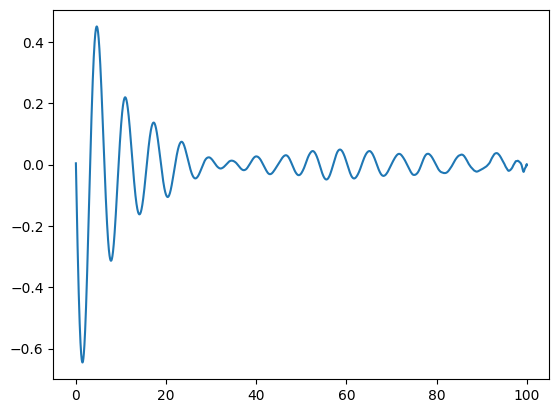

In [20]:
# parameters
alpha = 0.1
beta = 1.0
gmma = 0.1
D = 0.1
dt = 0.01
t0,tf = 0.0,100.0
N = int((tf-t0)/dt+1)
N_sim = 100          # for better accuracy

# single trajectory
def traj_11():
    x_arr = np.zeros((N,),float)
    y_arr = np.zeros((N,),float)
    for i in range(N-1):
        x_arr[i+1] = x_arr[i] + (alpha*x_arr[i]-beta*y_arr[i]-gmma*x_arr[i]*(x_arr[i]**2+y_arr[i]**2))*dt + (2*D*dt)**0.5*r.standard_normal()
        y_arr[i+1] = y_arr[i] + (alpha*y_arr[i]+beta*x_arr[i]-gmma*y_arr[i]*(x_arr[i]**2+y_arr[i]**2))*dt + (2*D*dt)**0.5*r.standard_normal()
    return x_arr, y_arr


# running the simulation once
t_arr = np.arange(t0,tf+dt,dt)
# calculating cross-correlation
cross_corr = np.zeros((N,),float)
for k in range(N_sim):
    x_arr, y_arr = traj_11()
    for i in range(N):
        cross_corr[i] += np.mean(x_arr[i:]*y_arr[:N-i])
cross_corr /= N_sim

# plotting
plt.plot(t_arr,cross_corr)
plt.show()